Bernoulli MOdel

question 1 part a

In [1]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import random
import math

Importing the dataset

In [2]:
data = [np.zeros(50) for i in range(400)]
i=0
with open('E:\ACADS STUFF\Semester 6\prml\Assignment 2\A2Q1.csv') as file:    
    csv_reader = csv.reader(file)    
    
    for row in csv_reader:  
            
        data[i] = row
       
        i+=1
#data = data.T

In [3]:
len(data)

400

In [4]:
data = np.array(data, dtype=float)

In [5]:
def random_initialise(data,num_clusters):
    rows = len(data)
    cols = len(data[0])
    p = [[np.random.rand() for i in range(0,cols)] for q in range(0,num_clusters)]
    pi_k = 1/num_clusters
    pi = [pi_k for i in range(num_clusters)]
    pi = np.array(pi)
    p = np.array(p)
    p = np.array(p, dtype=float)
    pi = np.array(pi, dtype=float)

    return p,pi


In [6]:
def expectation(data,num_clusters,p,pi):
    rows = len(data)
    cols = len(data[0])
    lamda = [[0 for k in range(num_clusters)] for i  in range(rows)]
    lamda = np.array(lamda, dtype=float)
    prod_k = [0 for i in range(rows)]
    prod_k = np.array(prod_k, dtype=float)
    for k in range(0,num_clusters):

        for i in range(0,rows):
            prod = 1
            for j in range(0,cols):
                
                prod = prod * (p[k][j] ** data[i][j]) * ((1-p[k][j]) ** (1-data[i][j]))
            lamda[i][k] = pi[k] * prod
            prod_k[i] += prod*pi[k]
    
    for i in range(0,len(lamda)):
        for k in range(len(lamda[i])):
            lamda[i][k] = lamda[i][k] / prod_k[i]
    
    return lamda

        



In [7]:
def maximisation(data,num_clusters,lamda):
    rows = len(data)
    cols = len(data[0])
    p = [[np.random.rand() for i in range(0,cols)] for q in range(0,num_clusters)]
    pi_k = 1/num_clusters
    pi = [pi_k for i in range(num_clusters)]
    p = np.array(p, dtype=float)
    pi = np.array(pi, dtype=float)
    for k in range(0,num_clusters):
        s = 0
        for i in range(0,rows):
            s = s+ lamda[i][k]
        pi[k] = s/rows
        
        for j in range(0,cols):
            s2 = 0
            for i in range(0,rows):
                s2 = s2 + lamda[i][k] * data[i][j]
            
            p[k][j] = s2/s
    return p,pi
    

    



In [8]:
def log_likelihood(data,p,pi,lamda,num_clusters):
    rows = len(data)
    cols = len(data[0])
    ll = 0
    for i in range(rows):
        s = 0
        for k in range(num_clusters):
            prod =1
            for j in range(cols):
                
                prod = prod * (p[k][j] ** data[i][j]) * ((1-p[k][j]) ** (1-data[i][j]))
            s += prod*pi[k]
        
        ll += np.log(s)
    return ll
                

    

Function to implement the EM algorithm for Bernoulli

In [9]:
def BMM(data,num_clusters,n_epochs):
    logging_log_like_values = []
    p,pi =  random_initialise(data,num_clusters)
    for iter in range(n_epochs):
        lamda = expectation(data,num_clusters,p,pi)
        p,pi = maximisation(data,num_clusters,lamda)
        ll = log_likelihood(data,p,pi,lamda,num_clusters)
        print(iter,ll)
        logging_log_like_values.append(ll)

    return lamda,p,pi,ll,logging_log_like_values
        
    

Average over 100 runs

In [33]:
Lf=BMM(data,4,300)
lf = Lf[4]
for i in range(0,99):
    L = BMM(data,4,300)
    lf = [x+y for x,y in zip(lf,L[4])]


0 -7000.150077559921
1 -6679.380704553549
2 -6668.380522454742
3 -6662.758631718503
4 -6658.354147356033
5 -6656.2884042391
6 -6655.005614382786
7 -6652.0573763964385
8 -6650.53306220696
9 -6649.874295418281
10 -6649.071192606979
11 -6648.536193280826
12 -6648.265015532763
13 -6648.079883639356
14 -6648.0158535964565
15 -6648.000606819794
16 -6647.9936355078835
17 -6647.988839018442
18 -6647.9850873958685
19 -6647.981948490366
20 -6647.97918449679
21 -6647.976629942751
22 -6647.97414345044
23 -6647.971581104991
24 -6647.9687749714
25 -6647.965509615707
26 -6647.961493802757
27 -6647.956331044298
28 -6647.949509375735
29 -6647.940467789939
30 -6647.928846406093
31 -6647.914993731528
32 -6647.900466442353
33 -6647.887724519792
34 -6647.878676244746
35 -6647.873481883846
36 -6647.870999502068
37 -6647.869964486799
38 -6647.869568826263
39 -6647.869423566685
40 -6647.869369846484
41 -6647.8693486391485
42 -6647.8693390961325
43 -6647.869333993192
44 -6647.869330798222
45 -6647.869328575884

In [ ]:
for i in range(len(lf)):
    lf[i] = lf[i]/100

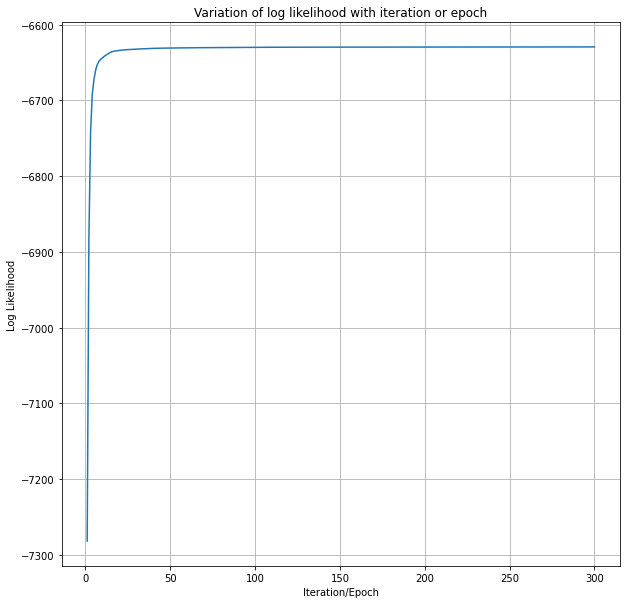

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Variation of log likelihood with iteration or epoch')
plt.plot(np.arange(1, 300 + 1), lf)
plt.xlabel('Iteration/Epoch')
plt.ylabel('Log Likelihood')
plt.grid(True)
plt.show()

Converting soft clustering into hard clustering, ie classifying all the data points into clusters for comparison with other methods

In [10]:
Lh=BMM(data,4,300)

0 -7616.174359546642
1 -7345.256439982644
2 -7009.807973713245
3 -6711.639957326195
4 -6662.682059919847
5 -6659.8984406248255
6 -6658.997268516675
7 -6658.5845146632355
8 -6658.336976590758
9 -6658.037957521943
10 -6657.001603824137
11 -6655.46926248569
12 -6655.032626664256
13 -6654.804130761857
14 -6654.6155447783785
15 -6654.369403136471
16 -6653.9002182289905
17 -6653.208736361174
18 -6652.845103300922
19 -6652.781743355224
20 -6652.7709321266375
21 -6652.768448310915
22 -6652.767844019322
23 -6652.767697173404
24 -6652.76766181146
25 -6652.767653354533
26 -6652.767651340295
27 -6652.767650861603
28 -6652.767650747958
29 -6652.767650721002
30 -6652.767650714603
31 -6652.767650713093
32 -6652.767650712726
33 -6652.767650712648
34 -6652.767650712622
35 -6652.767650712616
36 -6652.76765071261
37 -6652.767650712606
38 -6652.767650712618
39 -6652.767650712612
40 -6652.767650712622
41 -6652.767650712616
42 -6652.767650712617
43 -6652.767650712608
44 -6652.76765071261
45 -6652.7676507126

In [ ]:
la = Lh[0]

In [ ]:
z = [-1 for i in range(len(data))]

In [ ]:
for i in range(len(data)):
    ind = np.argmax(la[i])
    z[i] = ind

In [ ]:
def means_calc(data,z):
    s=[[0 for i in range(0,50)] for i in range(0,4)]
    num = [0 for i in range(0,4)]
    for i in range(len(z)):
        cluster = z[i]
        num[cluster]+=1
        #print(data[i])
        s[cluster] = [x+y for x,y in zip(s[cluster],data[i])]
    for i in range(len(s)):
        for j in range(len(s[i])):
            s[i][j] = s[i][j] / num[i]
    return s
        

Z is the assignment list it tells which cluster each point belongs to

In [ ]:
z

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 0,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 0,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 0,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [ ]:
m = means_calc(data,z)

In [ ]:
def score_calc(data,z,means):
    score = 0
    for i in range(len(data)):
        score += np.linalg.norm(data[i] - means[z[i]])
    return score

Calculate the objective which is the sum of distance of each point from its cluster center

In [ ]:
score_calc(data,z,m)

822.2071521700802